# Load Data

In [ ]:
from IPython import get_ipython
from IPython.display import display, HTML
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

from PIL import Image
from tqdm import tqdm

get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !mkdir "/content/gdrive/My Drive/DSCI/"
# !wget "http://www.broadinstitute.org/bbbc/BBBC022/BBBC022_v1_images_20585w1.zip" -O "/content/gdrive/My Drive/DSCI/BBBC022_v1_images_20585w1.zip"
# !wget "http://www.broadinstitute.org/bbbc/BBBC022/BBBC022_v1_images_20586w1.zip" -O "/content/gdrive/My Drive/DSCI/BBBC022_v1_images_20586w1.zip"
# !wget "https://data.broadinstitute.org/bbbc/BBBC022/BBBC022_v1_image.csv" -O "/content/gdrive/My Drive/DSCI/annotations.csv"

In [ ]:
# !unzip "/content/gdrive/My Drive/DSCI/BBBC022_v1_images_20585w1.zip" -d "/content/gdrive/My Drive/DSCI/train"
# !unzip "/content/gdrive/My Drive/DSCI/BBBC022_v1_images_20586w1.zip" -d "/content/gdrive/My Drive/DSCI/test"

In [ ]:
def visualize_first_images(images_dir):
  fig, axs  = plt.subplots(1, 4, figsize=(15, 15))

  for index, i in enumerate(sorted(os.listdir(images_dir))[:4]):
    img = plt.imread(os.path.join(images_dir, i))
    axs[index].imshow(img[:, :], cmap='gray')

  plt.tight_layout()
  plt.show()

In [ ]:
image_dir_train = "/content/gdrive/My Drive/DSCI/train/BBBC022_v1_images_20585w1/"
image_dir_test  = "/content/gdrive/My Drive/DSCI/test/BBBC022_v1_images_20586w1/"

In [ ]:
print(len(os.listdir(image_dir_train)))

3456


In [ ]:
for p in sorted(os.listdir(image_dir_train))[:10]:
  print(p)

IXMtest_A01_s1_w164FBEEF7-F77C-4892-86F5-72D0160D4FB2.tif
IXMtest_A01_s2_w1AA6B1894-F561-42EE-9D1D-E21E5C741B75.tif
IXMtest_A01_s3_w108F3A6FF-A865-40A1-8488-9A5BA31605A9.tif
IXMtest_A01_s4_w189967984-D8CB-4449-9CE5-EE2E5F1B8ED4.tif
IXMtest_A01_s5_w1DCC72C3D-6ABF-4D49-897E-5F35679A166D.tif
IXMtest_A01_s6_w11258626E-836F-4028-A3CB-50B83C60EAFF.tif
IXMtest_A01_s7_w179C24BDB-EF90-4FE8-BA34-932EA0272FCE.tif
IXMtest_A01_s8_w1032E967C-5DCF-45C9-A460-2F9FF2234C24.tif
IXMtest_A01_s9_w144EC6EFC-4CAE-411A-B641-EDA50D0E1550.tif
IXMtest_A02_s1_w17C9F8BDB-79F0-4F8B-852B-71161631F236.tif


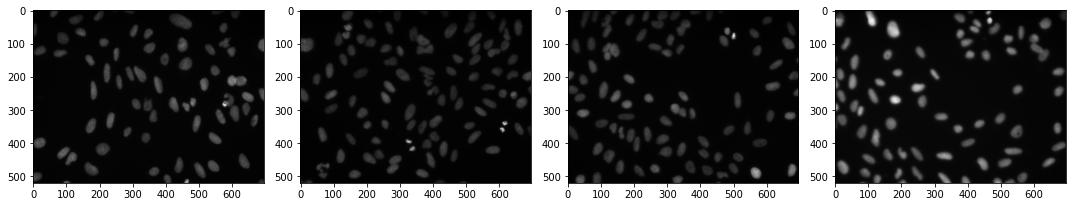

In [ ]:
visualize_first_images(image_dir_train)

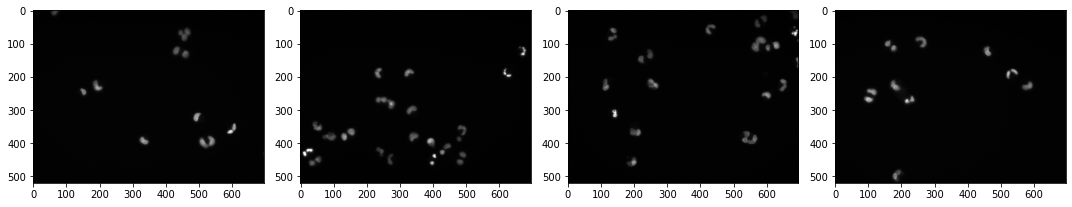

In [ ]:
visualize_first_images(image_dir_test)

In [ ]:
# Load metadata
df = pd.read_csv("/content/gdrive/My Drive/DSCI/annotations.csv")
print(df.shape)
display(df.head())

(7680, 36)


,Plate,Well,Well Number,Characteristics [Organism],Term Source 1 REF,Term Source 1 Accession,Characteristics [Cell Line],Term Source 2 REF,Term Source 2 Accession,Compound Broad Identifier,...,Has Phenotype,Phenotype Annotation Level,Phenotype 1,Phenotype 1 Term Name,Phenotype 1 Term Accession,Phenotype 2,Phenotype 2 Term Name,Phenotype 2 Term Accession,Plate Name,Well Name
0,4403,1029588,1,Homo sapiens,NCBITaxon,NCBITaxon_9606,U2OS,EFO,EFO_0002869,BRD-K98763141-001-06-8,...,yes,multiple replicates of a reagent,cellular response to chemical stimulus,cellular response to chemical stimulus phenotype,CMPO_0000421,NaN,NaN,NaN,20585,a1
1,4403,1029291,2,Homo sapiens,NCBITaxon,NCBITaxon_9606,U2OS,EFO,EFO_0002869,BRD-A41941932-001-03-0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20585,a2
2,4403,1029545,3,Homo sapiens,NCBITaxon,NCBITaxon_9606,U2OS,EFO,EFO_0002869,BRD-A26711594-001-02-7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20585,a3
3,4403,1029226,4,Homo sapiens,NCBITaxon,NCBITaxon_9606,U2OS,EFO,EFO_0002869,BRD-K65667145-001-05-8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20585,a4
4,4403,1029361,5,Homo sapiens,NCBITaxon,NCBITaxon_9606,U2OS,EFO,EFO_0002869,BRD-K61250553-001-02-9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20585,a5


In [ ]:
# split control and compound wells
df_train_control = df[(df['Compound Name'] == 'DMSO') & (df['Plate'] == 4403)]
df_test_compound = df[(df['Compound Name'] != 'DMSO') & (df['Plate'] == 4403)]

print(df_train_control.shape)
print(df_test_compound.shape)

(64, 36)
(320, 36)


In [ ]:
# extract value of dose and map compound name to upper case
def preprocess_compund(df):
  df['Dose'] = df['Dose'].apply(lambda x: float(x[:4]))
  df['Compound Name'] = df['Compound Name'].apply(lambda x: x.upper())
  return df

df_test_compound = preprocess_compund(df_test_compound)

In [ ]:
# Fix the convention of the well name according to the image path name
def preprocess_well_name(df):
  df['Well Name'] = df['Well Name'].apply(lambda x: x.upper() if len(x) == 3 else x[0].upper() + '0' + x[1])
  return df

df_train_control = preprocess_well_name(df_train_control)
df_test_compound = preprocess_well_name(df_test_compound)

In [ ]:
# get the image for the control set
def get_control_images(df_control):
  prefix = 'IXMtest_'
  controls = [prefix + wn for wn in list(df_control['Well Name'])]
  control_images = [image for image in os.listdir(image_dir_train) if image[:11] in controls]
  return control_images

control_images = sorted(get_control_images(df_train_control))
print(control_images[:20])

['IXMtest_A13_s1_w1B35C6D5D-DBF9-4779-990D-5E7AFB14D600.tif', 'IXMtest_A13_s2_w1951890F6-3FBD-488D-A559-E437F411FE17.tif', 'IXMtest_A13_s3_w15E34199F-8017-4618-B187-B19A4126E675.tif', 'IXMtest_A13_s4_w1B2FD8804-6DBB-4A62-B924-BE57135E0F2C.tif', 'IXMtest_A13_s5_w1A942A534-F6AD-45B7-B411-E46896937853.tif', 'IXMtest_A13_s6_w168BB4884-E6AA-4228-966F-F952C2F58C01.tif', 'IXMtest_A13_s7_w1E9B9D352-A8EA-4E3A-9295-BA3C42E5C64A.tif', 'IXMtest_A13_s8_w140DBC801-51FF-416D-B5C5-64DBD88E7CD6.tif', 'IXMtest_A13_s9_w1879CECA5-01DF-413B-BCCD-B31B45F09A94.tif', 'IXMtest_A14_s1_w17AEAE43F-5F47-460C-B448-EA0EC1D7F987.tif', 'IXMtest_A14_s2_w14C64CFF3-8968-4802-9F75-2AA8075D7EFC.tif', 'IXMtest_A14_s3_w1D4E4F896-7ED5-4C33-81A0-DED8665EEA9C.tif', 'IXMtest_A14_s4_w18316B5B4-013C-457C-968E-BC4D513F9453.tif', 'IXMtest_A14_s5_w1B1693B4A-FDC9-464D-8EB3-FFC09FF0B1BF.tif', 'IXMtest_A14_s6_w1495D381A-F6AE-456B-A5BE-F9D3534A4977.tif', 'IXMtest_A14_s7_w189A7B47E-314E-4232-AE4D-37639631C369.tif', 'IXMtest_A14_s8_w114DAC

In [ ]:
# get image for the compound set
compound_images = sorted(list(set(os.listdir(image_dir_train)).difference(set(control_images))))
print(len(compound_images))
print(len(control_images))

2880
576


In [ ]:
# load and preprocess control images - resize, normalize and split to patches
M = 128
N = 128
images_train_control = []

for i in tqdm(control_images):
  img = Image.open(os.path.join(image_dir_train, i)).resize((256, 256), Image.NEAREST)
  img = np.asarray(img) / 4095.
  tiles = [img[x:x+M,y:y+N] for x in range(0,img.shape[0],M) for y in range(0,img.shape[1],N)]

  images_train_control.extend(tiles)

100%|██████████| 576/576 [02:20<00:00,  4.11it/s]


In [ ]:
# load and preprocess compound images - resize, normalize and split to patches.
# get also the compound name for each image and the dose value

images_test_compound = []
y_compound = []
dose = []

for i in tqdm(compound_images):
  well_name = i[8:11]
  img = Image.open(os.path.join(image_dir_train, i)).resize((256, 256), Image.NEAREST)
  img = np.asarray(img) / 4095.
  tiles = [img[x:x+M,y:y+N] for x in range(0,img.shape[0],M) for y in range(0,img.shape[1],N)]
  images_test_compound.extend(tiles)
  y_compound.extend([df_test_compound[df_test_compound['Well Name'] == well_name]['Compound Name'].iloc[0] for i in range(len(tiles))])
  dose.extend([df_test_compound[df_test_compound['Well Name'] == well_name]['Dose'].iloc[0] for i in range(len(tiles))])

100%|██████████| 2880/2880 [01:00<00:00, 47.44it/s]


(128, 128)


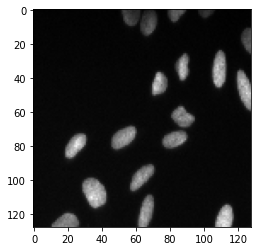

In [ ]:
print(np.array(images_train_control[25]).shape)
plt.imshow(images_train_control[25], cmap = 'gray')

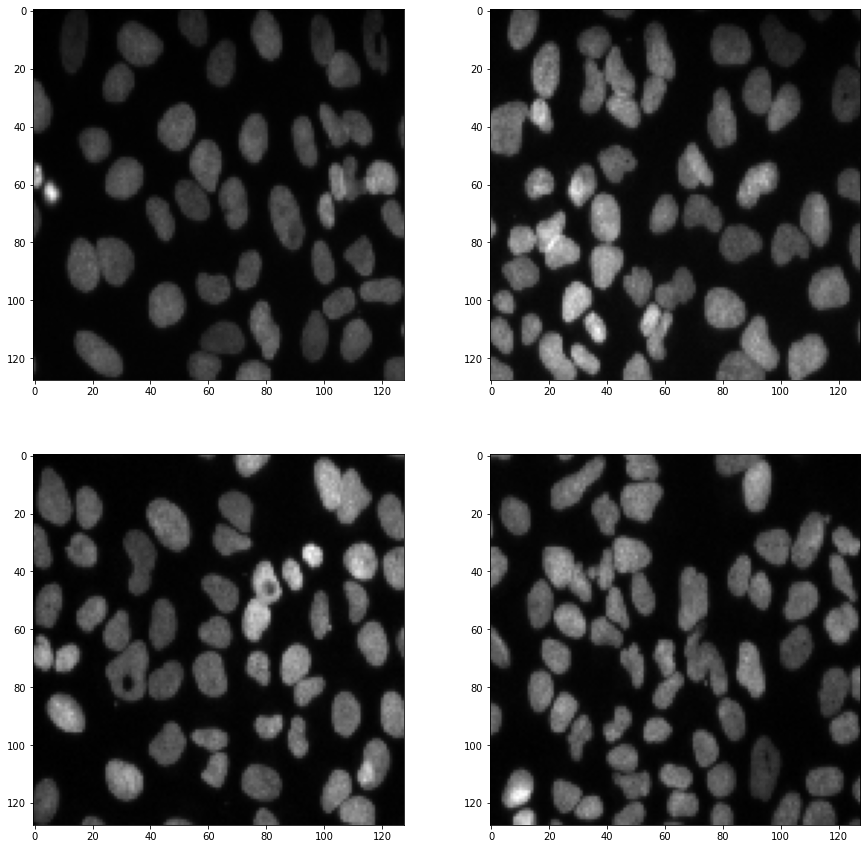

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (15,15))
axs[0,0].imshow(tiles[0], cmap = 'gray')
axs[0,1].imshow(tiles[1], cmap = 'gray')
axs[1,0].imshow(tiles[2], cmap = 'gray')
axs[1,1].imshow(tiles[3], cmap = 'gray')
plt.show()

(128, 128)


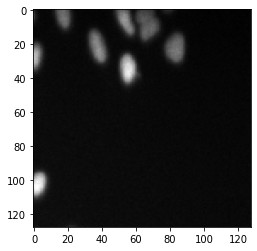

In [ ]:
print(np.array(images_test_compound[25]).shape)
plt.imshow(images_test_compound[25], cmap = 'gray')

# UNET Autoencoder

In [ ]:
# import libraries for DL
import keras
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.layers import Input,Conv2D,MaxPooling2D,Conv2DTranspose
from keras.models import Model
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models

%matplotlib inline

In [ ]:
# define training parameters
batch_size = 64
epochs = 14
inChannel = 1
x, y = 128, 128
input_img = Input(shape = (x, y, inChannel))

In [ ]:
# split into train and test the control set
from sklearn.model_selection import train_test_split

images_train_control = np.expand_dims(np.array(images_train_control), -1).astype(np.float32)
train_x, val_x,train_ground,val_ground=train_test_split(images_train_control, images_train_control, test_size=0.2,random_state=13)

In [ ]:
# define the autoencoder architecture
def conv2d(input_img,n_filters,size=(3,3),batchnorm=True):
    conv=Conv2D(filters=n_filters,kernel_size=size,kernel_initializer='he_normal',padding='same')(input_img)
    if batchnorm:
        conv=keras.layers.BatchNormalization()(conv)
    conv=keras.layers.Activation('relu')(conv)
    
    conv=Conv2D(filters=n_filters,kernel_size=size,kernel_initializer='he_normal',padding='same')(input_img)
    if batchnorm:
        conv=keras.layers.BatchNormalization()(conv)
    conv=keras.layers.Activation('relu')(conv)
    return conv


def unet_autoencoder(input_img,n_filters=16,dropout=0.1, latent_dim = 2, batchnorm=True):
    #Encoder
    conv1=conv2d(input_img,n_filters*1,size=(3,3),batchnorm=batchnorm)
    pool1=MaxPooling2D((2,2))(conv1)
    pool1=keras.layers.Dropout(dropout)(pool1)
    
    conv2=conv2d(pool1,n_filters*2,size=(3,3),batchnorm=batchnorm)
    pool2=MaxPooling2D((2,2))(conv2)
    pool2=keras.layers.Dropout(dropout)(pool2)
    
    conv3=conv2d(pool2,n_filters*4,size=(3,3),batchnorm=batchnorm)
    pool3=MaxPooling2D((2,2))(conv3)
    pool3=keras.layers.Dropout(dropout)(pool3)
    
    conv4=conv2d(pool3,n_filters*8,size=(3,3),batchnorm=batchnorm)
    print(conv4.shape)
    pool4=MaxPooling2D((2,2))(conv4)
    pool4=keras.layers.Dropout(dropout)(pool4)
    
    conv5=conv2d(pool4,n_filters*16,size=(3,3),batchnorm=batchnorm)
    
    flatten = keras.layers.Flatten()(conv5)
    encoder_out = keras.layers.Dense(latent_dim)(flatten)
    
    decoder_in = tf.keras.layers.Dense(units=8*8*256, activation=tf.nn.relu)(encoder_out)
    upconv6 = tf.keras.layers.Reshape(target_shape=(8, 8, 256))(decoder_in)
    
    #Decoder

    up6=Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(upconv6)
    print(up6.shape)
    up6=concatenate([up6,conv4])
    up6=keras.layers.Dropout(dropout)(up6)
    conv6=conv2d(up6,n_filters*8,size=(3,3),batchnorm=batchnorm)
    
    up7=Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(conv6)
    up7=concatenate([up7,conv3])
    up7=keras.layers.Dropout(dropout)(up7)
    conv7=conv2d(up7,n_filters*4,size=(3,3),batchnorm=batchnorm)
    
    up8=Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(conv7)
    up8=concatenate([up8,conv2])
    up8=keras.layers.Dropout(dropout)(up8)
    conv8=conv2d(up8,n_filters*2,size=(3,3),batchnorm=batchnorm)
    
    up9=Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(conv8)
    up9=concatenate([up9,conv1])
    up9=keras.layers.Dropout(dropout)(up9)
    conv9=conv2d(up9,n_filters*1,size=(3,3),batchnorm=batchnorm)
    
    output=Conv2D(1,(1,1),activation='sigmoid')(conv9)
    model = Model(input_img, output)
    encoder = Model(input_img)
    return model

In [ ]:
# init the model
autoencoder = unet_autoencoder(input_img, n_filters=16, dropout=0.1,latent_dim=32,batchnorm=True)
autoencoder.compile(loss='mean_squared_error',optimizer='adam')
autoencoder.summary()

(None, 16, 16, 128)
(None, 16, 16, 128)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 128, 128, 16  64         ['conv2d_1[0][0]']               
 rmalization)                   )                     

In [ ]:
with tf.device('/gpu:0'):
    train_autoencoder = autoencoder.fit(train_x, train_ground,batch_size=16,epochs=epochs,verbose=2,validation_data=(val_x, val_ground),callbacks=[EarlyStopping(monitor='val_loss',patience=3)])

Epoch 1/14
116/116 - 25s - loss: 0.0429 - val_loss: 0.0168 - 25s/epoch - 218ms/step
Epoch 2/14
116/116 - 5s - loss: 0.0064 - val_loss: 0.0051 - 5s/epoch - 40ms/step
Epoch 3/14
116/116 - 5s - loss: 0.0018 - val_loss: 0.0018 - 5s/epoch - 40ms/step
Epoch 4/14
116/116 - 4s - loss: 7.7563e-04 - val_loss: 6.3745e-04 - 4s/epoch - 33ms/step
Epoch 5/14
116/116 - 4s - loss: 4.5731e-04 - val_loss: 2.4403e-04 - 4s/epoch - 33ms/step
Epoch 6/14
116/116 - 4s - loss: 3.3388e-04 - val_loss: 1.4524e-04 - 4s/epoch - 33ms/step
Epoch 7/14
116/116 - 4s - loss: 2.3380e-04 - val_loss: 6.6368e-05 - 4s/epoch - 33ms/step
Epoch 8/14
116/116 - 4s - loss: 1.8448e-04 - val_loss: 6.2432e-05 - 4s/epoch - 33ms/step
Epoch 9/14
116/116 - 4s - loss: 1.5763e-04 - val_loss: 5.3210e-05 - 4s/epoch - 33ms/step
Epoch 10/14
116/116 - 4s - loss: 1.4258e-04 - val_loss: 1.0084e-04 - 4s/epoch - 33ms/step
Epoch 11/14
116/116 - 4s - loss: 1.2988e-04 - val_loss: 4.0216e-05 - 4s/epoch - 33ms/step
Epoch 12/14
116/116 - 4s - loss: 1.2991e

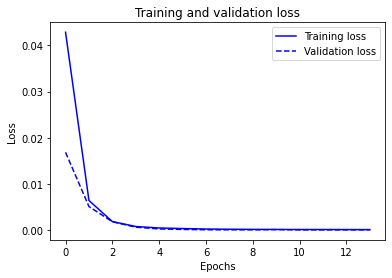

In [ ]:
# show training results
loss = train_autoencoder.history['loss']
val_loss = train_autoencoder.history['val_loss']
epochs = range(0,14)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# predict test images
pred = autoencoder.predict(val_x, batch_size = 32)

Validation Images:


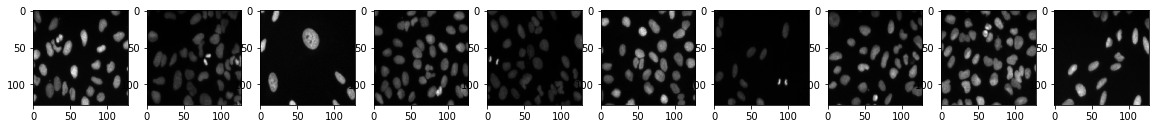

In [ ]:
# visualize original images 
plt.figure(figsize=(20, 4))
print("Validation Images:")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(val_x[i, ..., 0], cmap='gray')  
plt.show()

 Reconstructed Validation Images:


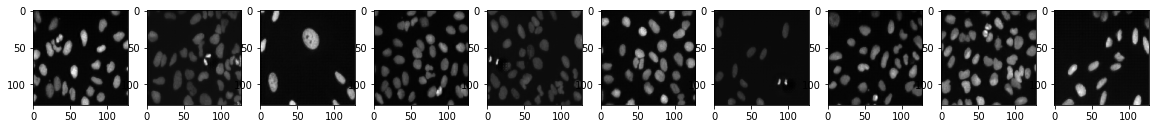

In [ ]:
# visualize reconstructed images 
plt.figure(figsize=(20, 4))
print(" Reconstructed Validation Images:")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

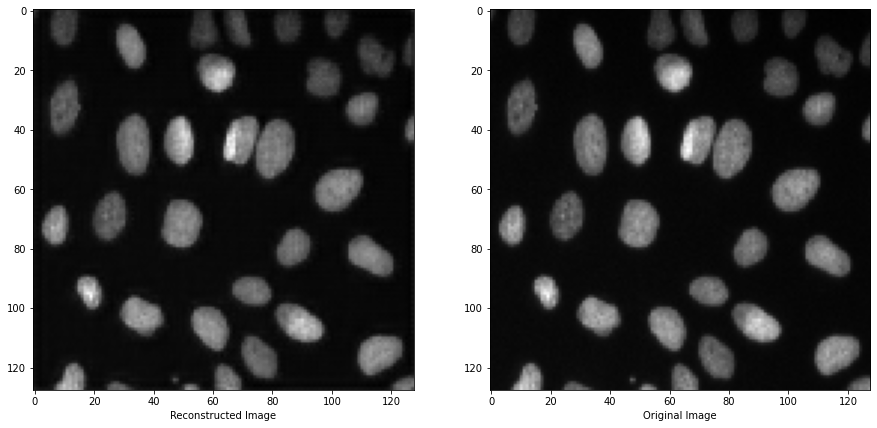

In [ ]:
# closer visualization
fig, axs = plt.subplots(1,2, figsize = (15,15))
axs[0].imshow(pred[24, ..., 0], cmap='gray') 
axs[1].imshow(val_x[24, ..., 0], cmap='gray')  
axs[0].set_xlabel('Reconstructed Image')
axs[1].set_xlabel('Original Image')

plt.show()

In [ ]:
def plot_label_clusters(result):
    # display a 2D plot of the digit classes in the latent space
    plt.figure(figsize=(12, 10))
    plt.scatter(result[:, 0], result[:, 1], c=total_y)
    plt.colorbar()
    plt.xlabel("p1")
    plt.ylabel("p2")
    plt.show()

In [ ]:
# preprocess compound set
comp_test = np.asarray(np.expand_dims(images_test_compound, -1).astype(np.float32))

# create target labels
y_control = np.asarray(['control' for i in range(len(images_train_control))])
y_comp = np.asarray(['compound' for i in range(len(comp_test))])

# concatenate all images
total_images = np.concatenate([images_train_control, comp_test])
total_y = np.concatenate([y_control, y_comp])

# get the encoder output
encoder = Model(autoencoder.input, outputs = [autoencoder.get_layer('dense').output])

# DNN Classification

In [ ]:
# define DNN architecture
num_copounds = df_test_compound['Compound Name'].nunique()

class_model = models.Sequential()
class_model.add(layers.Dense(units = 64, activation='relu', input_shape=(33,)))
class_model.add(layers.BatchNormalization())
class_model.add(layers.Dropout(0.1))

class_model.add(layers.Dense(64, activation='relu'))
class_model.add(layers.BatchNormalization())
class_model.add(layers.Dropout(0.1))

class_model.add(layers.Dense(32, activation='relu'))
class_model.add(layers.Dense(num_copounds))
class_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                2176      
                                                                 
 batch_normalization_18 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_19 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 64)                0

In [ ]:
# embedding vectors for all compound images
comp_data_prediction = encoder.predict(comp_test)

In [ ]:
# add dose value
dose_ = np.asarray(np.expand_dims(dose, -1))
comp_data_prediction = np.hstack([comp_data_prediction, dose_])

In [ ]:
# split to train and test
comp_train, comp_val, comp_y_train, comp_y_val = train_test_split(comp_data_prediction, y_compound, test_size = 0.2, random_state=42)

In [ ]:
comp_y_val.shape

(2304,)

In [ ]:
# encode target values 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
comp_y_train = le.fit_transform(comp_y_train)
comp_y_val = le.transform(comp_y_val)

In [ ]:
comp_y_train.shape

(9216,)

In [ ]:
# find baseline result
from collections import Counter
Counter(comp_y_val).most_common()[0][1] / len(comp_y_val)

0.007378472222222222

In [ ]:
len(comp_train)

9216

In [ ]:
# train DNN model
class_model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = class_model.fit(comp_train, comp_y_train, epochs=200, batch_size =  128,
                    validation_data=(comp_val, comp_y_val))

Epoch 1/200
72/72 [==============================] - 3s 21ms/step - loss: 5.7597 - accuracy: 0.0049 - val_loss: 5.7588 - val_accuracy: 0.0056
Epoch 2/200
72/72 [==============================] - 0s 5ms/step - loss: 5.7404 - accuracy: 0.0065 - val_loss: 5.7366 - val_accuracy: 0.0074
Epoch 3/200
72/72 [==============================] - 0s 6ms/step - loss: 5.7154 - accuracy: 0.0074 - val_loss: 5.7115 - val_accuracy: 0.0078
Epoch 4/200
72/72 [==============================] - 0s 5ms/step - loss: 5.6922 - accuracy: 0.0085 - val_loss: 5.6865 - val_accuracy: 0.0122
Epoch 5/200
72/72 [==============================] - 0s 5ms/step - loss: 5.6643 - accuracy: 0.0115 - val_loss: 5.6550 - val_accuracy: 0.0178
Epoch 6/200
72/72 [==============================] - 0s 5ms/step - loss: 5.6355 - accuracy: 0.0123 - val_loss: 5.6264 - val_accuracy: 0.0191
Epoch 7/200
72/72 [==============================] - 0s 5ms/step - loss: 5.6007 - accuracy: 0.0127 - val_loss: 5.5937 - val_accuracy: 0.0182
Epoch 8/200


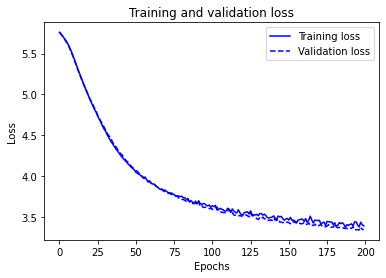

In [ ]:
# show DNN convergence
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0,200)
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# fins most common compounds
Counter(y_compound).most_common()

In [ ]:
# encoder their names from their labels
le.inverse_transform([24, 311])

array(['ACONITINE', 'VITEXIN'], dtype='<U71')

In [ ]:
# get last hidden layer of DNN
embed_comp = Model(class_model.input, outputs = [class_model.get_layer('dense_4').output])

In [ ]:
# get indices of compounds
aconitine_idx = [i for i, j in enumerate(y_compound) if j == 'ACONITINE']
vitexin_idx   = [i for i, j in enumerate(y_compound) if j == 'VITEXIN']

In [ ]:
# get compound vectors of both compounds
aconitine_embeddings = encoder.predict(comp_test[aconitine_idx])
aconitine_embeddings = np.hstack([aconitine_embeddings, dose_[aconitine_idx]])
aconitine_embeddings = embed_comp.predict(aconitine_embeddings)

vitexin_embeddings = encoder.predict(comp_test[vitexin_idx])
vitexin_embeddings = np.hstack([vitexin_embeddings, dose_[vitexin_idx]])
vitexin_embeddings = embed_comp.predict(vitexin_embeddings)

In [ ]:
# set color as compound name
colors = ['ACONITINE' for i in range(len(aconitine_embeddings))]
colors.extend(['VITEXIN' for i in range(len(vitexin_embeddings))])
len(colors)

108

In [ ]:
# set symbol as dose value
colors_dose =  [d[0] for d in dose_[aconitine_idx]]
colors_dose.extend([d[0] for d in dose_[vitexin_idx]])
len(colors_dose)

108

In [ ]:
# concatenate all
aconitine_vitexin = np.concatenate([aconitine_embeddings, vitexin_embeddings])

In [ ]:
# visualize results using PCA and plotly express
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(aconitine_vitexin)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=colors,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(aconitine_vitexin)

fig = px.scatter(components, x=0, y=1, color=colors, labels={
                     "0": "PC1",
                     "1": "PC2",
                 },)
fig.update_layout(width = 800, margin=dict(l=20, r=20, t=20, b=20),)
fig.show()

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(aconitine_vitexin)

fig = px.scatter(components, x=0, y=1, color=colors, symbol=colors_dose, labels={
                     "0": "PC1",
                     "1": "PC2",
                 },)
fig.update_layout(width = 800, margin=dict(l=20, r=20, t=20, b=20))
fig.update_traces(marker_size=10)

fig.show()

In [ ]:
# show all compounds
all_comp_embeddings = encoder.predict(comp_test)
all_comp_embeddings = np.hstack([all_comp_embeddings, dose_])
all_comp_embeddings = embed_comp.predict(all_comp_embeddings)
symbol_dose = [d[0] for d in dose_]

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(all_comp_embeddings)

fig = px.scatter(components, x=0, y=1, color=y_compound, symbol = symbol_dose, labels={
                     "0": "PC1",
                     "1": "PC2",
                 },)
fig.update_layout(width = 1500, margin=dict(l=20, t=20, b=20))
fig.show()